<a href="https://colab.research.google.com/github/ShariqZahid/Szahid/blob/main/My_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.


# **GitHub Link -**

https://github.com/ShariqZahid/Szahid.git

# **Problem Statement**


Analyzing key factors responsible for app engagement and success is very crucial for the developers creating apps and listing them on Playstore.

The Playstore apps has enormous potential to drive app-making businesses to success. Actionable insigths can be drawn for developers to work on and capture the Android market.

Various insights like the type of app and category of app most popular among users can be drawn. Features in the app which is increasing user engagement. Also, the whitespaces and pain points that users are facing in those existing apps and ways to tackle those whitespaces in new apps can be extracted.


#### **Define Your Business Objective?**

Key Factors Responsile for App Engagement and Success


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [26]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
path ='/content/drive/MyDrive/EDA Project/'
ps_df = pd.read_csv(path+"Play Store Data.csv")
ur_df = pd.read_csv(path+"User Reviews.csv")

### Dataset First View

In [48]:
# Dataset first look
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# dataset first look
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
ps_df.shape

(10841, 13)

In [7]:
ur_df.shape

(64295, 5)

### Dataset Information

In [8]:
# Dataset Info
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicates = ps_df[ps_df.duplicated()]
duplicates_count = len(duplicates)
duplicates_count

483

In [11]:
non_duplicates_count = len(ps_df) - duplicates_count
non_duplicates_count

10358

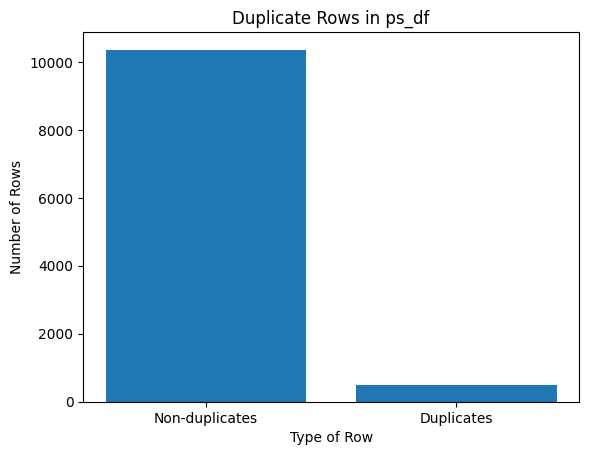

In [12]:
plt.bar(['Non-duplicates', 'Duplicates'], [non_duplicates_count, duplicates_count])
plt.xlabel('Type of Row')
plt.ylabel('Number of Rows')
plt.title('Duplicate Rows in ps_df')
plt.show()

In [16]:
dup_count = len(ur_df[ur_df.duplicated()])
dup_count

33616

In [18]:
non_dup_count = len(ur_df) - dup_count
non_dup_count

30679

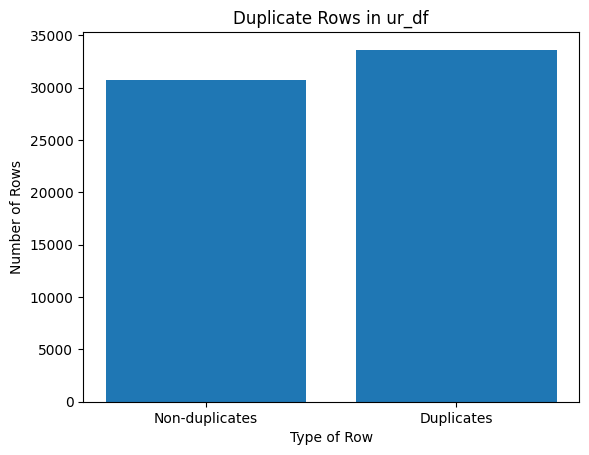

In [19]:
plt.bar(['Non-duplicates', 'Duplicates'], [non_dup_count, dup_count])
plt.xlabel('Type of Row')
plt.ylabel('Number of Rows')
plt.title('Duplicate Rows in ur_df')
plt.show()

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

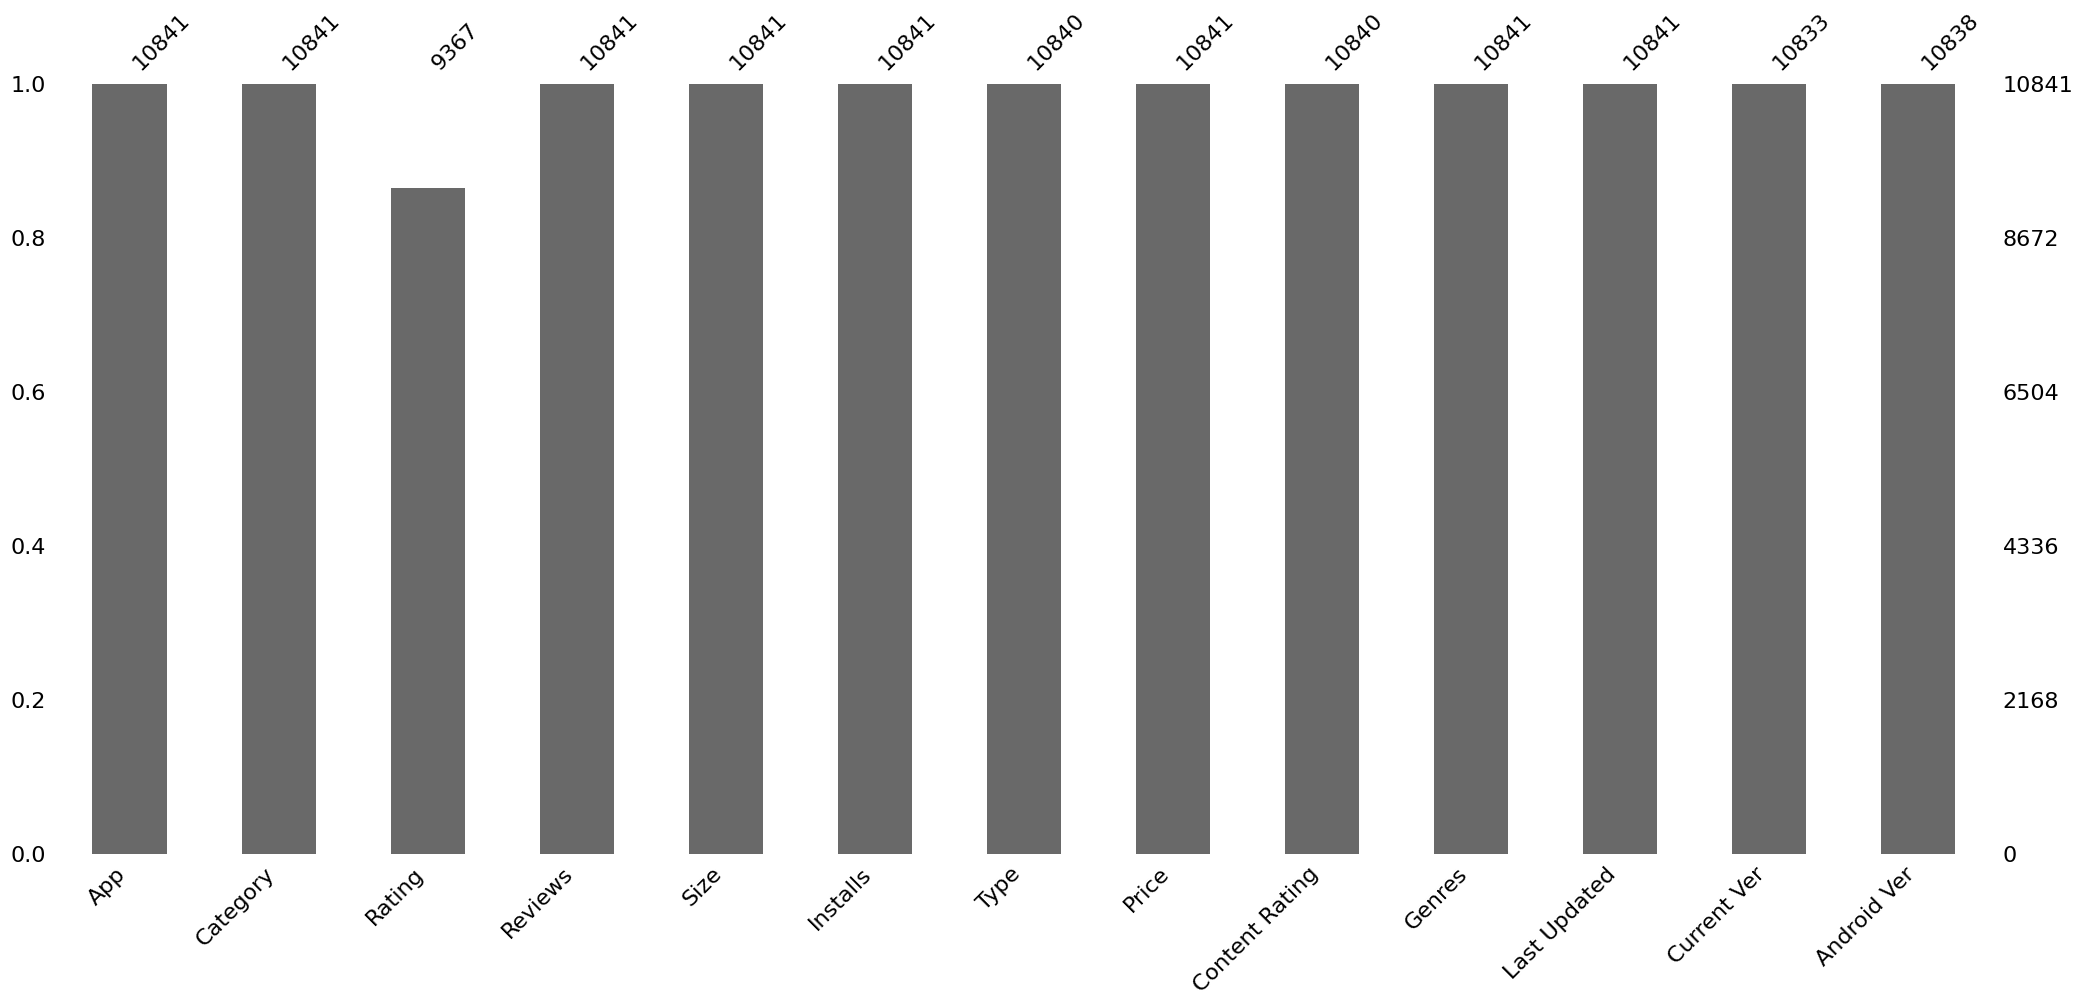

In [37]:
# Visualizing the missing values
msno.bar(ps_df)

In [31]:
ur_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

<Axes: >

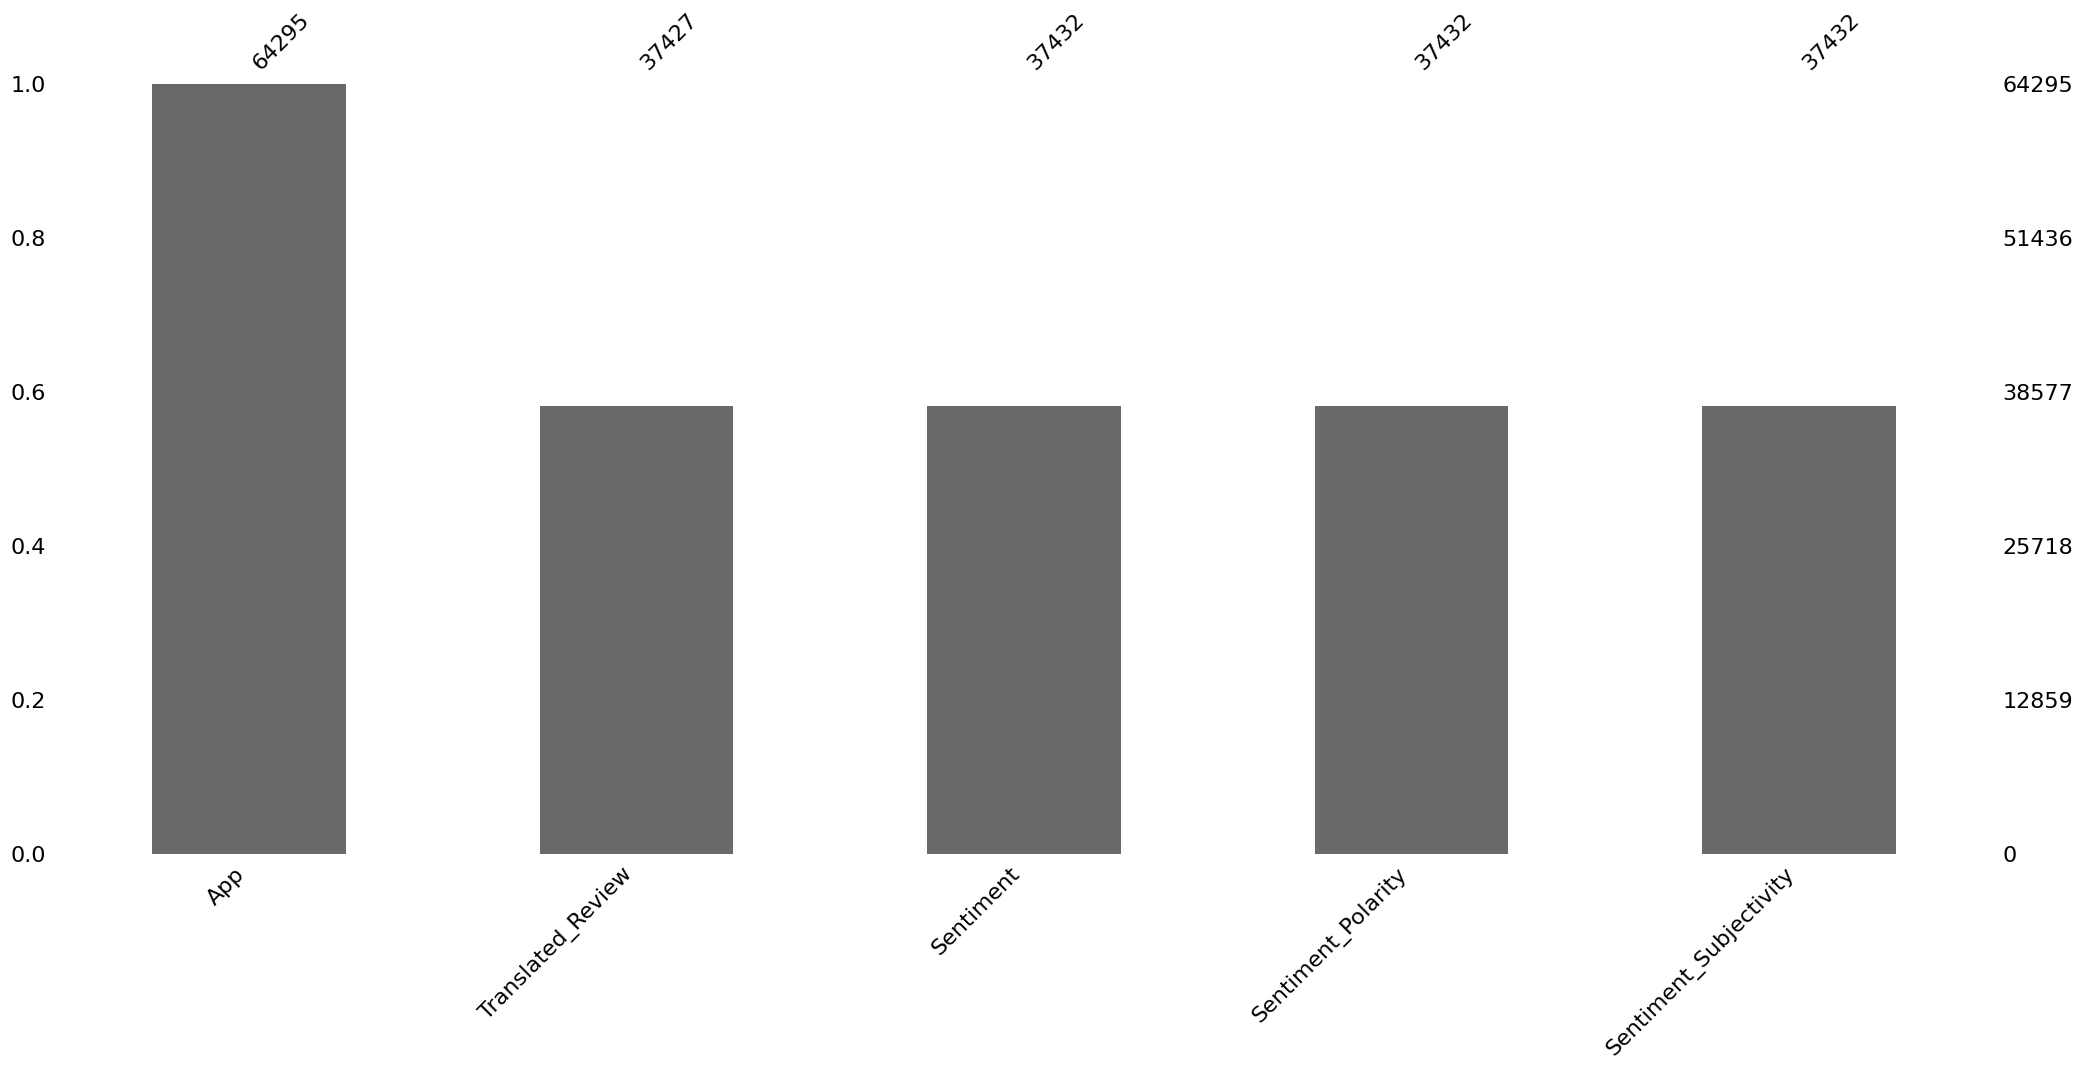

In [36]:
msno.bar(ur_df)

### What did you know about your dataset?

There are two datasets and these given datasets belongs to the Play store, and we have to analyze key factors responsible for app engagement and success.

The goal is to analyze the data and draw insights that is leading to the app being a hit or a failure that in turn could help the developers while creating and listing new apps on the Playstore. 

The Playstore dataset(ps_df) has 10841 Rows and 13 Columns. There are 1474 null values in Rating column, 1 null value each in Type and Content Rating column, 8 null values in current ver column and 3 null values in android ver column. Also, there are in total 483 duplicate values in the dataset.

The User Review dataset(ur_df) has 64295 Rows and 5 Columns. There are 26868 null values in Translated_Review column and 26863 null values each in Sentiment, Sentiment_Polarity and Sentiment_Subjectivity Columns.
Also, there are in total 33616 duplicate values in the dataset which is actually expected since the columns are mostly categorical in nature.

## ***2. Understanding Your Variables***

In [41]:
# Dataset Columns
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [43]:
# Dataset Columns
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [44]:
# Dataset Describe
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [45]:
# Dataset Describe
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description 

In Playsore dataset, variables are:-
*   **App :** Name of the apps available in the dataset
*   **Category :** Kind of App(Art and Design, Family etc) 
*   **Rating :** Ratings given by the user to the particular app(1 to 5)
*   **Reviews :** Views of the users on the apps
*   **Size :** Size of the app(in M)
*    **Installs :** Number of times app installed 
*   **Type :** Type of app(Free/Paid)
*   **Price :** Cost of the app(in $)
*   **Content Rating :** Suitability of app according to age(Teen,Everyone,etc)
*   **Genres :** More granular division of the kind of app
*   **Last Updated :** Date of App last updated
*   **Current Ver :** Current Version of the app 
*   **Android Ver :** Android version of the phone compatible with the app 

In User Review dataset, variables are:-
*   **App :** Name of the apps available in the dataset
*   **Translated_Review :** Review in another language translated to english
*   **Sentiment :** Overall sentiment of the app user(Positive/Negative/Neutral)
*   **Sentiment_Polarity :** Sentiment polarity refers to the degree of    
positivity or negativity of a review. It is often measured on a scale from -1 to +1, with -1 indicating very negative sentiment, +1 indicating very positive sentiment, and 0 indicating neutral sentiment.
*   **Sentiment_Subjectivity :** Sentiment subjectivity refers to the degree to which a review is subjective or objective. It is often measured on a scale from 0 to 1, with 0 indicating a completely objective review and 1 indicating a completely subjective review.







### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

In [ ]:
8271/(8271+23998+5158)

0.22099019424479655

### Data Wrangling Code

In [ ]:
df1['Sentiment'].nunique()

3

In [ ]:
ps_df['App'].nunique()

9660

In [ ]:
ps_df.groupby('App').agg({'App':'count' })


,App
App,
"""i DT"" Fútbol. Todos Somos Técnicos.",1
+Download 4 Instagram Twitter,1
- Free Comics - Comic Apps,1
.R,1
/u/app,1
...,...
"뽕티비 - 개인방송, 인터넷방송, BJ방송",1
💎 I'm rich,1
"💘 WhatsLov: Smileys of love, stickers and GIF",1


In [ ]:
df1['App'].nunique()

1074

In [ ]:
# ~ 42% of the records have null values in ur_df
#df1.shape
df1.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***